#NETFLIX-Exploratory Data Analysis









Importing the required Python Libraries for Data Analysis and Visualizations

In [2]:
import numpy as np # for numerical calculations
import pandas as pd # for data manipulation
from scipy import stats
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt # for data visualization
from wordcloud import WordCloud
from PIL import Image
import warnings
warnings.filterwarnings('ignore')#to ignore warnings

In [3]:
#Importing the Netflix Data
df = pd.read_csv("/content/drive/MyDrive/Netflix.csv")

#Analyzing Dataset: General Overview


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
print("The Shape of the data is:", df.shape)
print()
print("The dimension of the data is:", df.ndim)

The Shape of the data is: (8807, 12)

The dimension of the data is: 2


In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##Check for Duplication

In [13]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are no duplicate entry in the dataset

#Data Pre-processing

Check for Null Values/Missing Values

In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

% of missing values

In [15]:
(df.isnull().sum()/(len(df)))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Removing the empty data in columns 'date_added', 'rating', and 'duration' since they are few and won't impact our overall study significantly. However, we will keep the null values in 'director', 'cast', and 'country' columns, as the associated categorical data could provide valuable insights for our analysis.

In [16]:
df.dropna(subset = ['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [17]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

In [18]:
df.dropna(subset = ['duration'],inplace=True)
df['duration'].isna().sum()

0

In [19]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

So, we have dropped all the null values present in 'date_added', 'rating' and 'duration' column.

#Data Reduction and Manipulation

The column 'show_id' can be dropped as it is not adding any value to our analysis.

In [20]:
df.drop(columns='show_id',inplace=True)

Renaming the 'listed_in' column name to 'Genre'

In [21]:
df.rename(columns={'listed_in':'Genre'},inplace=True)
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description'],
      dtype='object')

In [22]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


The column 'date_added' is in object datatype so we need to change it to date-time format.

In [23]:
df["date_added"]=pd.to_datetime(df["date_added"])

Adding day, month, year, month_name, day_name as seperate columns to the dataframe as these will help us in further analysis.

In [24]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday


Checking for unique values of rating and categorising them

In [25]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Netflix has officially categorised the above ratings into 3 main categories-link for reference(https://help.netflix.com/en/node/2064/us)
 -so grouping them and using that for our EDA.

Replacing:-

 1. 'PG-13','TV-14' to "Teens"

 2. 'R','TV-MA','NC-17' to "Adults"

 3. 'TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV' to "Kids"

 4. 'NR','UR' to "Not_Rated"

In [26]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],'Not_Rated')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [27]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', 'Not_Rated'], dtype=object)

Deleting the rows that have the director, country and cast all three as 'NaN'

In [28]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [29]:
df.dropna(subset = ['director','country','cast'], how = 'all',inplace=True)
df.shape

(8694, 16)

Un-nesting the columns-"director","cast","country" and "Genre" which has Nested Data in them. This will help us in analysing and getting insights with respect to unique director, cast, country and genre.

In [30]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday


In [31]:
def unnest_columns(df,columns):
  for col in columns:
      df[col] = df[col].str.split(',')
      df = df.explode(col)
  return df

In [32]:
columns_to_unnest = ['director','cast','country','Genre']

In [33]:
df_unnested = unnest_columns(df,columns_to_unnest)

In [34]:
df_unnested.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,Adults,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,Adults,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday


In [35]:
df_unnested.shape

(201653, 16)

Handling Null Values after un-nesting

In [36]:
df_unnested.isnull().sum().sort_values(ascending=False)

director        50241
country         11710
cast             1965
type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
Genre               0
description         0
day                 0
month               0
year                0
month_name          0
weekday             0
dtype: int64

All the null values present in the columns- director,country and cast will be filled with Unknown director, Unknown cast and Unknown rating respectively.

In [37]:
df_unnested.fillna({"director":"Unknown director","cast":'Unknown cast',"country":'Unknown country','rating':'Unknown rating',},inplace=True)

In [38]:
df_unnested.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
dtype: int64

In [39]:
df_unnested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201653 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          201653 non-null  object        
 1   title         201653 non-null  object        
 2   director      201653 non-null  object        
 3   cast          201653 non-null  object        
 4   country       201653 non-null  object        
 5   date_added    201653 non-null  datetime64[ns]
 6   release_year  201653 non-null  int64         
 7   rating        201653 non-null  object        
 8   duration      201653 non-null  object        
 9   Genre         201653 non-null  object        
 10  description   201653 non-null  object        
 11  day           201653 non-null  int64         
 12  month         201653 non-null  int64         
 13  year          201653 non-null  int64         
 14  month_name    201653 non-null  object        
 15  weekday       20165

We have done the fundamental data analysis and data clean-up, so we can start with EDA.

##EDA

Lets look at some of the descriptive statistics of our dataframe before unnesting

In [40]:
df.describe()

,release_year,day,month,year
count,8694.000000,8694.000000,8694.000000,8694.000000
mean,2014.144582,12.483207,6.655049,2018.862664
std,8.804727,9.890735,3.443727,1.573244
min,1942.000000,1.000000,1.000000,2008.000000
25%,2013.000000,1.000000,4.000000,2018.000000
50%,2017.000000,13.000000,7.000000,2019.000000
75%,2019.000000,20.000000,10.000000,2020.000000
max,2021.000000,31.000000,12.000000,2021.000000


Descriptive statistics of our dataframe after unnesting

In [41]:
df_unnested.describe()

,release_year,day,month,year
count,201653.000000,201653.000000,201653.000000,201653.00000
mean,2013.446663,12.184322,6.635984,2018.96546
std,9.017797,9.846948,3.442226,1.55123
min,1942.000000,1.000000,1.000000,2008.00000
25%,2012.000000,1.000000,4.000000,2018.00000
50%,2016.000000,12.000000,7.000000,2019.00000
75%,2019.000000,20.000000,10.000000,2020.00000
max,2021.000000,31.000000,12.000000,2021.00000


We are dealing with two main types: Movies and TV Shows. We'll call them df_movie and df_tvshow as separate dataframes. Movies have durations in minutes, while TV Shows have them in seasons

In [42]:
df_movie = df_unnested.loc[df_unnested['type']=='Movie']
df_tvshow = df_unnested.loc[df_unnested['type']=='TV Show']

In [43]:
print(df_movie.shape)
print(df_tvshow.shape)

(145873, 16)
(55780, 16)


The 'duration' column contains values like '90 minutes', '125 minutes' etc for movies and '1 seasons','2 seasons' etc for TV shows. We will remove 'minutes' and 'seasons' from their respective dataframes.

In [44]:
df_movie['duration'] = df_movie['duration'].str.replace('min',"")

df_movie.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
6,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday


In [45]:
df_tvshow['duration'] = df_tvshow['duration'].str.replace('Seasons',"")
df_tvshow['duration'] = df_tvshow['duration'].str.replace('Season',"")
df_tvshow.rename(columns={'duration':'seasons'},inplace=True)
df_tvshow.head()

,type,title,director,cast,country,date_added,release_year,rating,seasons,Genre,description,day,month,year,month_name,weekday
1,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,Adults,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
1,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,Adults,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
1,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,Adults,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
1,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,Adults,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
1,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,Adults,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday


Time period of our data and the count of different contents.

In [46]:
print(df['year'].min())
print(df['year'].max())
print("")
print(df.shape[0])

2008
2021

8694


The dataset covers the time period from 2008 to 2021 and includes a total of 8694 movies and TV shows for us to watch.

Count of Movies and TV Shows

In [47]:
print('Total Movies: ', df[df['type']=='Movie'].shape[0])
print('Total TV Shows: ', df[df['type']=='TV Show'].shape[0])


Total Movies:  6109
Total TV Shows:  2585


There are a total of 6109 movies and 2585 TV shows available to watch.




In [48]:
df_unnested['director'].nunique()

5119

There are a total of 5119 directors present in the data

In [49]:
df_unnested['cast'].nunique()

39249

There are a total of 39249 actors present in the data.

In [50]:
df_unnested['country'].nunique()

198

The content is distributed across 198 countries

#Visualizations

###Distribution of content on Netflix

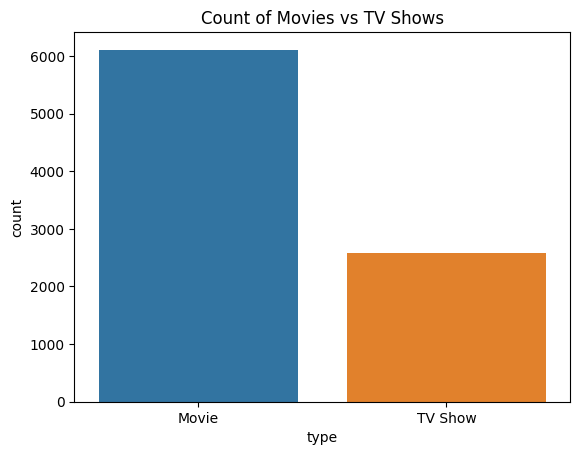

In [51]:
sns.countplot(x='type',data=df)
plt.title("Count of Movies vs TV Shows")
plt.show()

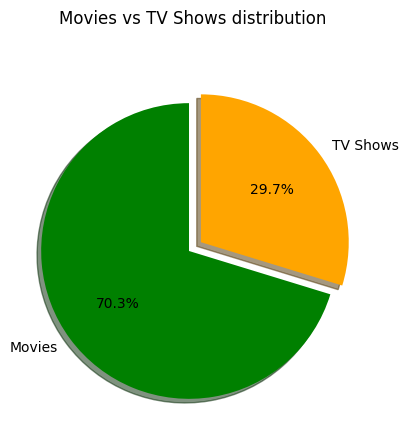

In [52]:
contents = ['Movies', 'TV Shows']
my_colors = ['g','orange']
plt.pie(df.groupby('type')['type'].count(), labels = contents,colors=my_colors, explode = (0.1,0), autopct = '%1.1f%%',startangle=90,shadow = True)
plt.suptitle('Movies vs TV Shows distribution')
plt.show()

**Insights**

1. Movies make up 70% of Netflix's content

2. TV Shows are clearly lesser than Movies

**Recommendations**

Netflix should add more TV Shows- More TV shows mean extended suspense and richer narratives, allowing users to binge-watch captivating stories over time, deepening engagement and enhancing their entertainment experience.

In [53]:
df_unnested['country'].value_counts()

United States      49781
India              22139
Unknown country    11710
United Kingdom      9706
 United States      9482
                   ...  
 Samoa                 2
 Sri Lanka             2
 Kazakhstan            1
 Uganda                1
 Nicaragua             1
Name: country, Length: 198, dtype: int64

In [54]:
df_top10_Countries = df_unnested.drop_duplicates(subset = ['country', 'title'])


In [55]:
a = df_top10_Countries['country'].value_counts().head(10)
a

United States      3202
India              1008
Unknown country     733
United Kingdom      627
 United States      479
Canada              271
Japan               257
France              212
South Korea         211
 France             181
Name: country, dtype: int64

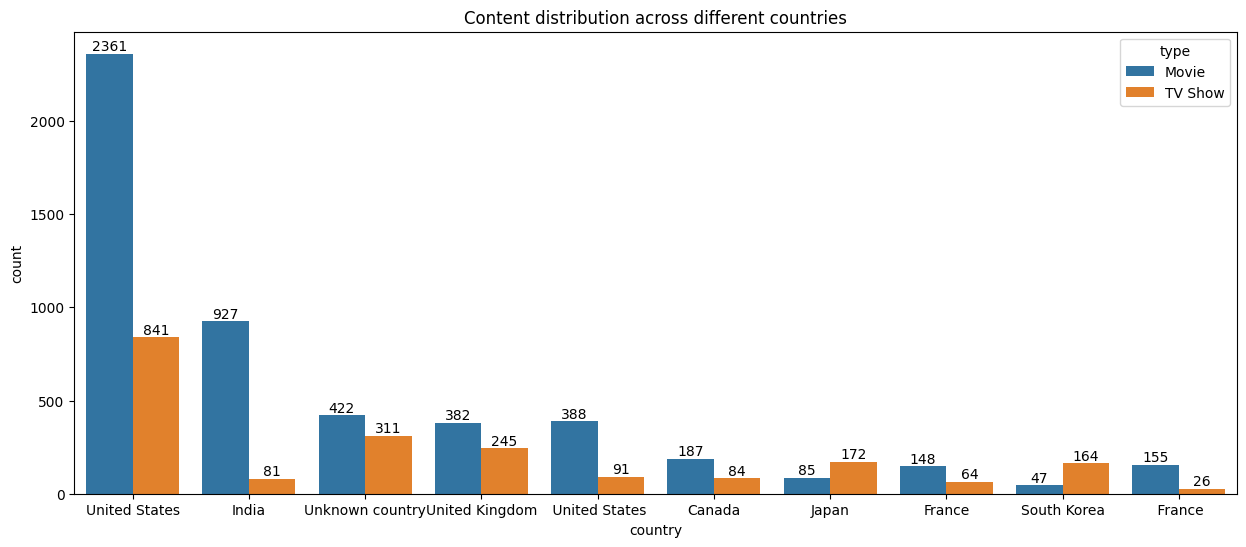

In [56]:
plt.figure(figsize = (15,6))
plt.title('Content distribution across different countries')
my_colors = ['g','orange']
label = sns.countplot(data = df_top10_Countries, x = 'country', hue = 'type', order=a.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

**Insights**

1. The US leads in movie content, followed by India and the UK.
2. The US and UK are prominent creators of TV shows.
3. A distinctive trend emerges: across nations, movies outnumber TV shows, with an exception in Japan and South Korea, where TV shows dominate.

**Recommendations**

1. The number of movies greatly exceeds TV shows in all countries, especially in India. To bridge this gap, adding more TV shows is a good idea since TV shows can keep viewers engaged over several seasons, which is longer than a 100-minute movie.
   
2. TV shows have become really popular lately and are now preferred over movies by many people. They offer a fresh and demanded way of storytelling. So-

**Netflix can:**
1. Diversify TV show genres.
2. Prioritize original TV content.
3. Extend successful shows.
4. Partner with local creators.
5. Highlight binge-worthy shows.
6. Invest in global TV acquisitions.

##Top 10 Directors

In [57]:
df_movie.shape

(145873, 16)

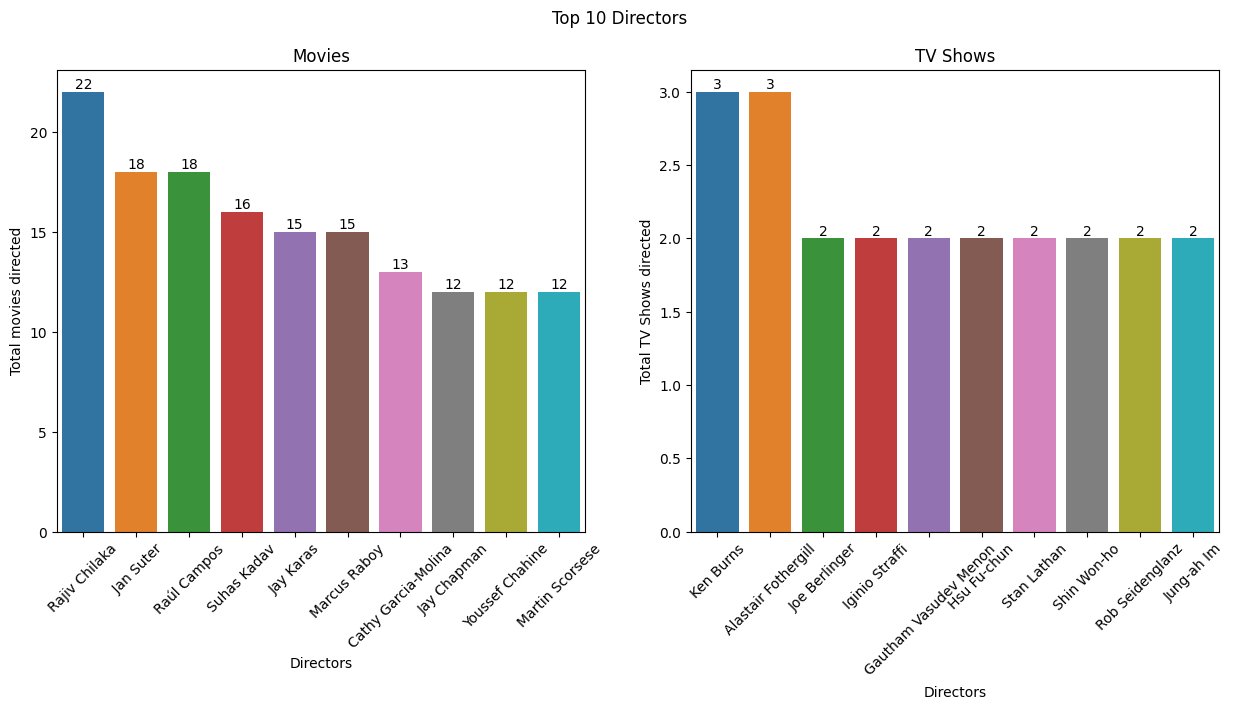

In [58]:
df_Top10_D_movie = df_movie.drop_duplicates(subset = ['director','title'])
df_Top10_D_tvshow = df_tvshow.drop_duplicates(subset = ['director','title'])

plt.figure(figsize = (15,6))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_Top10_D_movie, x='director', order = df_Top10_D_movie['director'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Directors')
plt.ylabel('Total movies directed')
plt.title("Movies")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
label = sns.countplot(data=df_Top10_D_tvshow, x='director', order = df_Top10_D_tvshow['director'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Directors')
plt.ylabel('Total TV Shows directed')
plt.title("TV Shows")
plt.xticks(rotation=45)

plt.show()

**Insights**



*  Rajiv Chilaka, Jan Suter, and Raul Campos lead as the most prolific
directors with 22, 18, and 18 movies respectively.

*  Conversely, when it comes to TV shows, all directors have been involved in around 2-3 shows each.


##Top 10 Actors

In [59]:
df_movie.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
6,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday


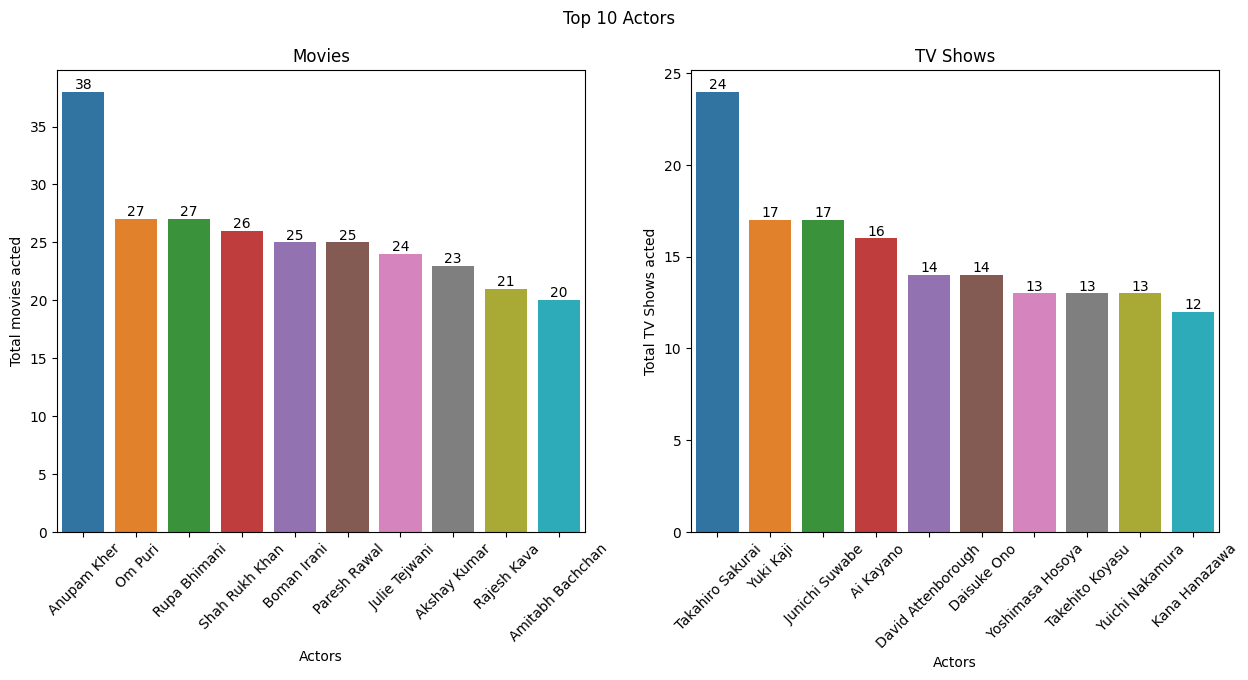

In [60]:
df_Top10_Actor_movie = df_movie.drop_duplicates(subset = ['cast','title'])
df_Top10_Actor_tvshow = df_tvshow.drop_duplicates(subset = ['cast','title'])

plt.figure(figsize = (15,6))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_Top10_Actor_movie, x='cast', order = df_Top10_Actor_movie['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Actors')
plt.ylabel('Total movies acted')
plt.title("Movies")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
label = sns.countplot(data=df_Top10_Actor_tvshow, x='cast', order = df_Top10_Actor_tvshow['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Actors')
plt.ylabel('Total TV Shows acted')
plt.title("TV Shows")
plt.xticks(rotation=45)

plt.show()

**Insights:**


* Anupam Kher stands out with the highest number of movie appearances, followed by Om Puri and Rupa Bhimani.

* Among the top 10 actors in movies, all are of Indian origin, while the top 10 actors in TV shows represent various nationalities.

* Males dominate the top 10 movie actors with 8 spots.

**Recommendations:**

* The presence of Indian actors in TV shows is relatively limited.
To enhance TV show viewership in India, Netflix should consider introducing more TV shows featuring Indian actors.

##Top 10 Genres

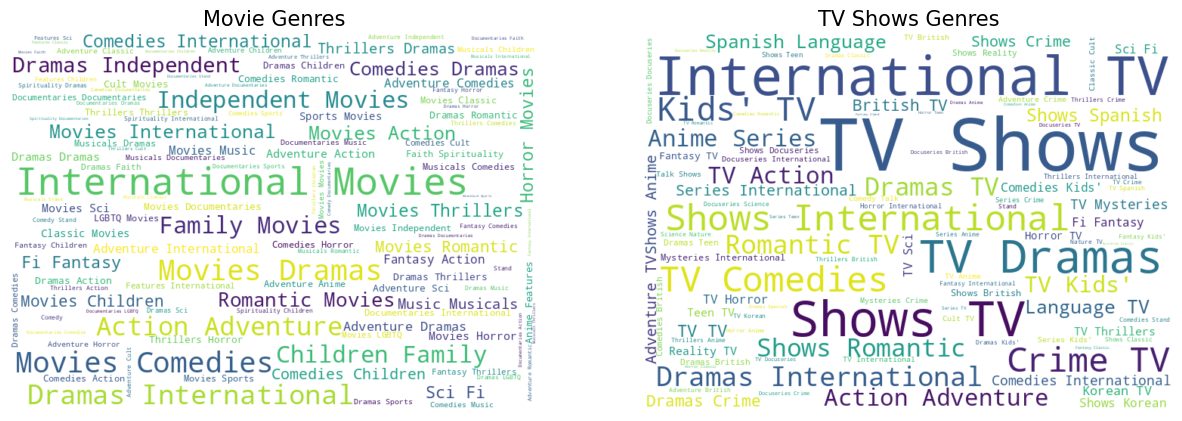

In [61]:
genre_wc = " ".join(df_movie["Genre"])
wordcloud = WordCloud(width=700, height=500, background_color= "white").generate(genre_wc)



plt.figure(figsize=(15, 12))


plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.title("Movie Genres", color='black',size =15)

genre_wc = " ".join(df_tvshow["Genre"])
wordcloud = WordCloud(width=700, height=500, background_color="white").generate(genre_wc)

plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres", color='black',size =15)

plt.show()

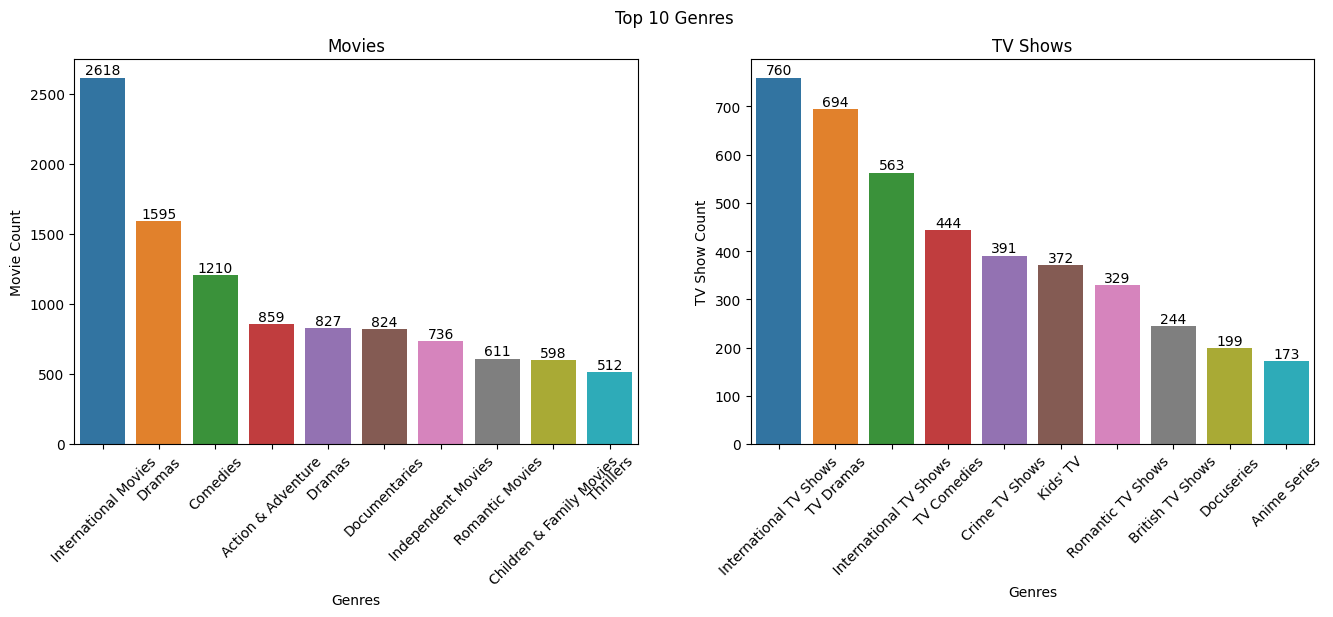

In [62]:
df_movies_top10_G = df_movie.drop_duplicates(subset = ['Genre','title'])
df_tvshow_top10_G = df_tvshow.drop_duplicates(subset = ['Genre','title'])

plt.figure(figsize = (16,5))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data= df_movies_top10_G, x='Genre', order = df_movies_top10_G['Genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvshow_top10_G, x='Genre', order = df_tvshow_top10_G['Genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

**Insights:**

Based on the graph, the majority of content belongs to the International genre, followed by Drama and Comedy.

**Recommendation:**

The International genre dominates the content offerings for TV shows as well. To provide a well-rounded viewing experience, Netflix should consider diversifying its content by incorporating a broader range of genres.

##Classification of Content based on age group

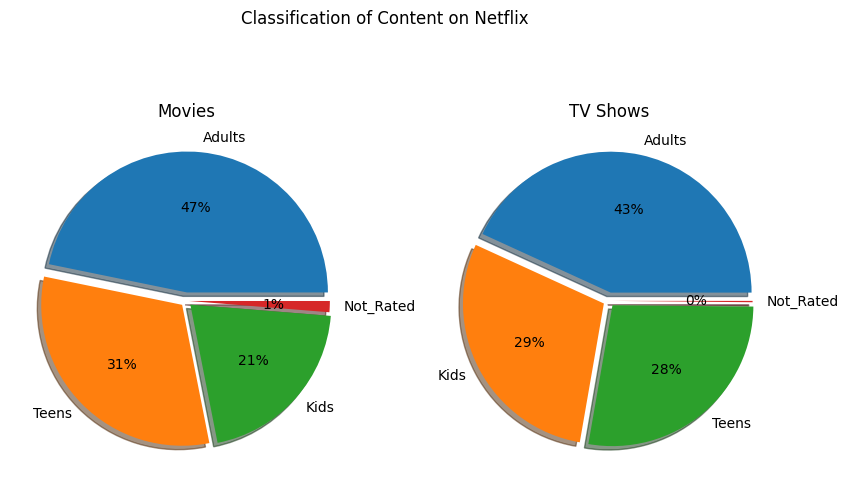

In [63]:
df_movies_age_group = df_movie.drop_duplicates(subset = ['rating','title'])
df_tvshow_age_group = df_tvshow.drop_duplicates(subset = ['rating','title'])

plt.figure(figsize = (10,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_age_group['rating'].value_counts(), labels = df_movies_age_group['rating'].value_counts().index, autopct='%.0f%%', explode = (0.06,0.04,0.04,0.02), shadow = True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvshow_age_group['rating'].value_counts(), labels = df_tvshow_age_group['rating'].value_counts().index, autopct='%.0f%%', explode = (0.06,0.04,0.04,0.02), shadow = True)
plt.title('TV Shows')

plt.show()

**Insights:**

Netflix content is mostly for adults, followed by teens and kids

**Recommendations:**

* Create and add more shows and movies that teens would enjoy.
* Offer relatable stories and characters that resonate with teenagers' interests.
* Promote teen-focused content to attract and engage younger viewers.

##Peak Times for Adding Movies and TV Shows on Netflix

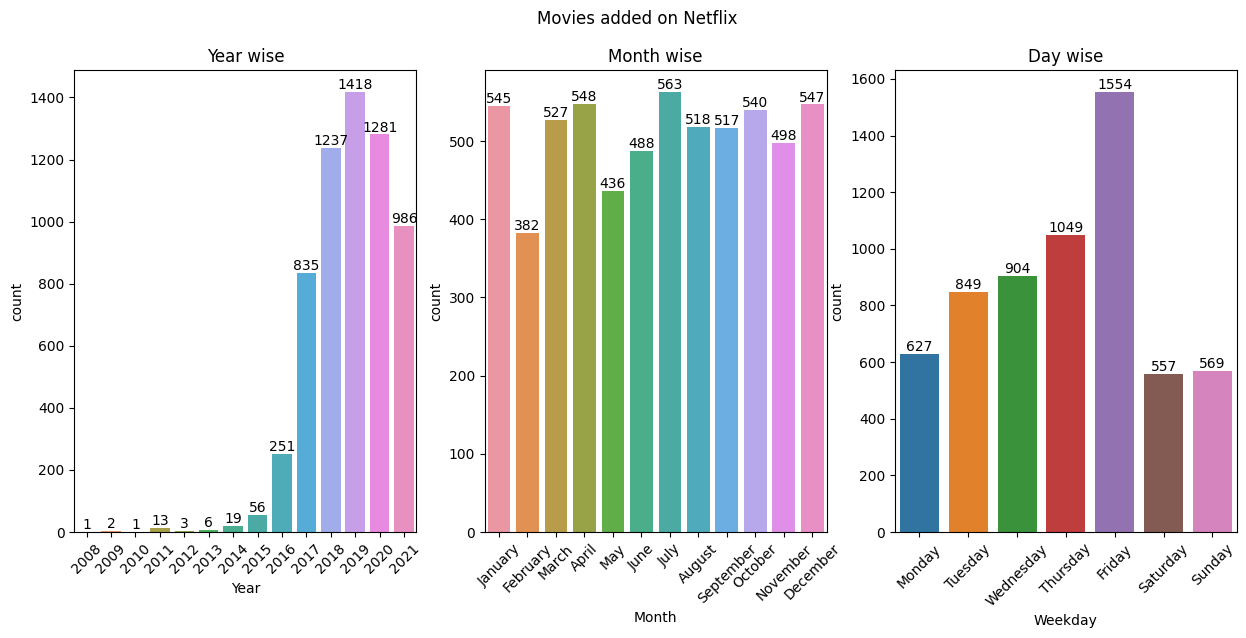

In [64]:
df_movies_add_year = df_movie.drop_duplicates(subset = ['year','title'])


added_year = df_movies_add_year['year'].value_counts()
added_year.sort_index(inplace=True)

added_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
movie_month = df_movies_add_year['month_name'].value_counts().loc[added_month]

added_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
movie_day = df_movies_add_year['weekday'].value_counts().loc[added_day]


plt.figure(figsize=(15,6))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_add_year, x='year', order = added_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_add_year, x='month_name', order = movie_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_add_year, x='weekday', order = movie_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()


**Insights:**

- Most movie releases were in 2019 and 2020.
- July saw the highest movie releases.
- Fridays were the prime choice for release days.

**Suggestions for Increased Revenue:**

1. **Strategic Timing**: Plan major movie releases in July and on Fridays to maximize viewership.

2. **Recent Content**: Prioritize content from 2019 and 2020 for fresh appeal.

3. **Intensive Promotion**: Promote July and Friday releases vigorously to generate excitement.

4. **Exclusive Premieres**: Secure exclusive premiere rights for anticipated releases.

5. **Partnerships**: Collaborate with studios and filmmakers for impactful releases.

Leveraging these insights can strategically boost Netflix's revenue and audience engagement.

##TV Shows Added

In [65]:
df_movie.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday


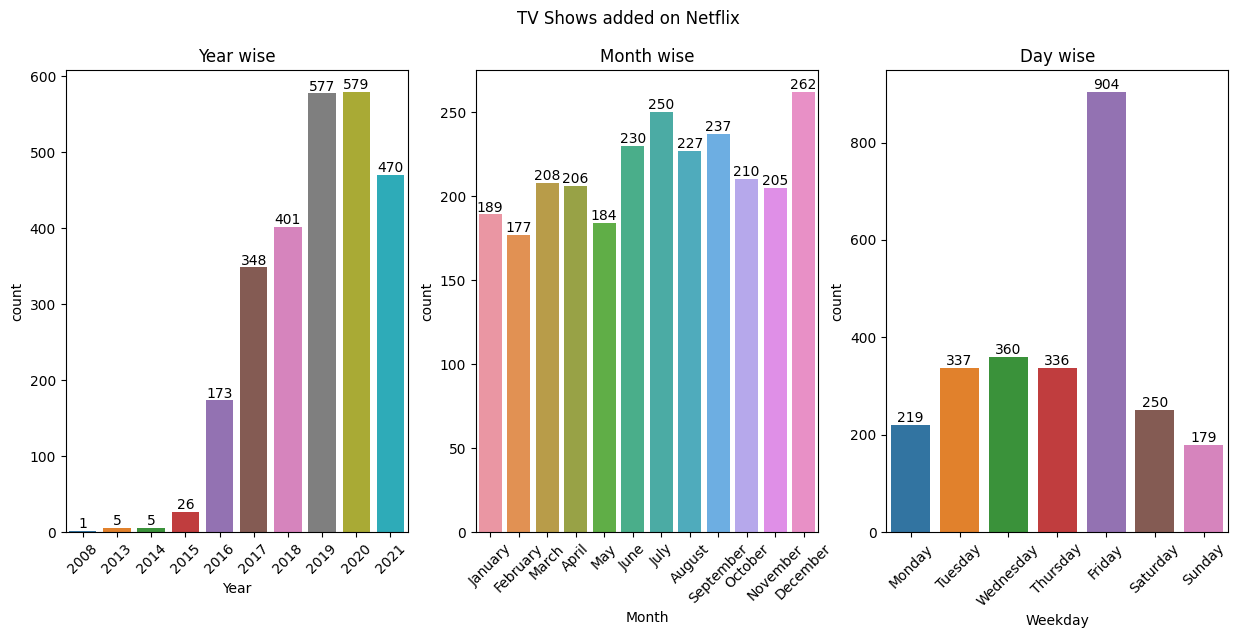

In [66]:
df_tvshows_add_year = df_tvshow.drop_duplicates(subset = ['year','title'])


added_year = df_tvshows_add_year['year'].value_counts()
added_year.sort_index(inplace=True)

added_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tvshow_month = df_tvshows_add_year['month_name'].value_counts().loc[added_month]

added_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tvshow_day = df_tvshows_add_year['weekday'].value_counts().loc[added_day]


plt.figure(figsize=(15,6))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_tvshows_add_year, x='year', order = added_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvshows_add_year, x='month_name', order = tvshow_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvshows_add_year, x='weekday', order = tvshow_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()


**Insights:**

- TV show releases peaked in 2019 and 2020.
- High release months were December, July, and September.
- Fridays emerged as the favored release day.

**Recommendations to Increase Revenue:**

1. **Strategic Release Timing**: Plan TV show releases for peak months like December, July, and September to attract larger audiences.

2. **Content Selection**: Prioritize acquiring shows from 2019 and 2020 for fresh and relevant offerings.

3. **Holiday-Focused Content**: Create and release shows aligned with Indian vacation and festival seasons, particularly in April-May and October-December.

4. **Collaborate**: Partner with Indian creators to produce exclusive content for Netflix.

By utilizing these insights and recommendations, Netflix can strategically enhance revenue by catering to viewer preferences and cultural occasions.

##Time gap between Netflix addition and movie release for post-release additions

In [99]:
df_movie.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday,days_to_add
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,18894
6,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,18893
6,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,18893


In [111]:
df_temp1 = pd.to_datetime(df_movie['release_year'])
df_temp1.head()

0   1970-01-01 00:00:00.000002020
6   1970-01-01 00:00:00.000002021
6   1970-01-01 00:00:00.000002021
6   1970-01-01 00:00:00.000002021
6   1970-01-01 00:00:00.000002021
Name: release_year, dtype: datetime64[ns]

In [110]:
df_temp2 = pd.to_datetime(df_movie['date_added'])
df_temp2.head()

0   2021-09-25
6   2021-09-24
6   2021-09-24
6   2021-09-24
6   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [112]:
df_movie['days_to_add'] = ((df_temp2)-(df_temp1)).dt.days
df_movie['days_to_add']

0       18894
6       18893
6       18893
6       18893
6       18893
        ...  
8806    17956
8806    17956
8806    17956
8806    17956
8806    17956
Name: days_to_add, Length: 145873, dtype: int64

In [124]:
df_movie.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday,days_to_add
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,18894
6,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,18893
6,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown country,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,18893


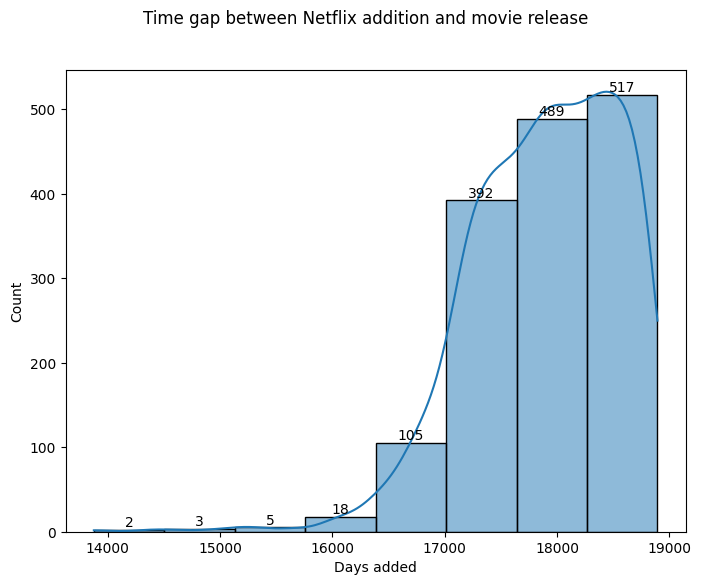

In [116]:
plt.figure(figsize=(8,6))
plt.suptitle('Time gap between Netflix addition and movie release')

plt.subplot(1,1,1)
label = sns.histplot(df_movie['days_to_add'].drop_duplicates(), bins=8, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Days added')
plt.show()

In [117]:
mode_days = df_movie["days_to_add"].mode().iloc[0]
mode_days

18261

**Insights**:

Roughly 1000, mostly old movies were added to Netflix after about 18261 days from when they were released.

##Average Movie Duration and Average TV Show Seasons

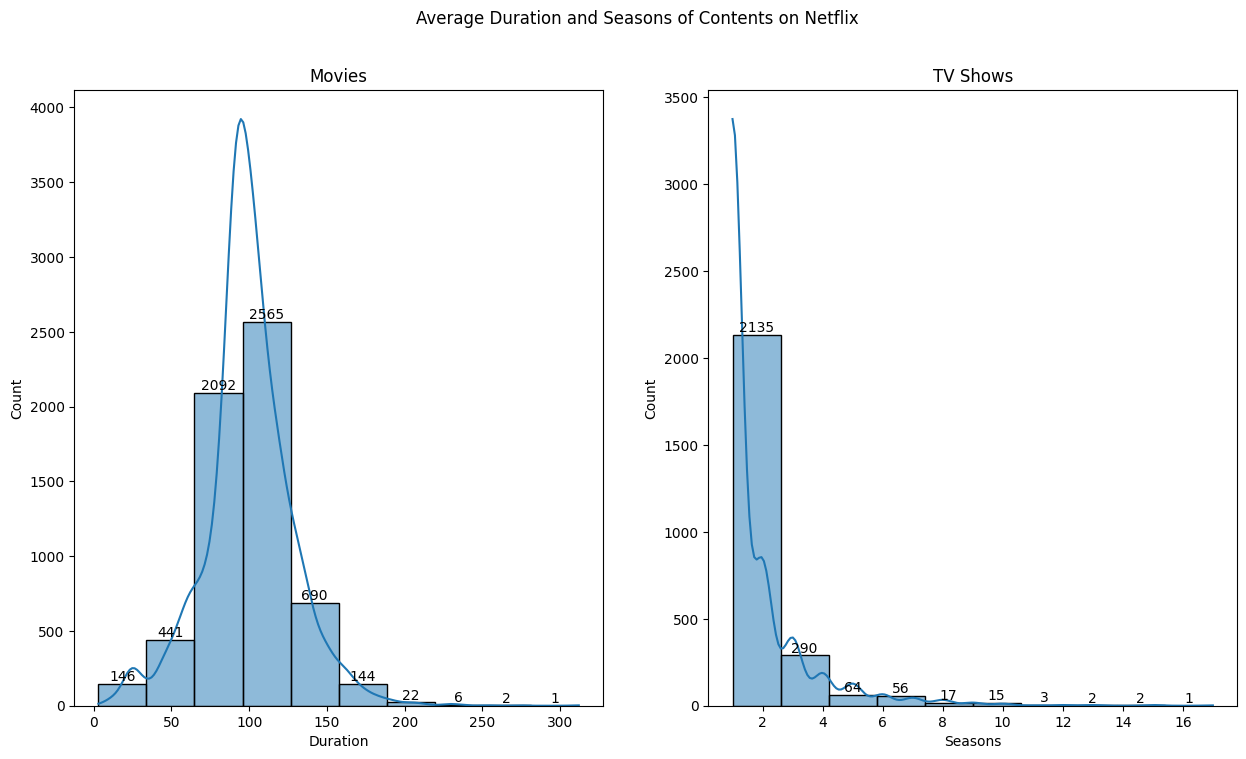

In [118]:
df_movies_avg = df_movie.drop_duplicates(subset = ['duration','title'])
df_tvshow_avg = df_tvshow.drop_duplicates(subset = ['seasons','title'])


plt.figure(figsize=(15,8))
plt.suptitle('Average Duration and Seasons of Contents on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_avg['duration'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.histplot(df_tvshow_avg['seasons'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

**Insights:**

- Approximately 4600 movies fall within the 60 to 125-minute duration range.
- Around 2150 TV shows typically consist of approximately 2 seasons.

**Recommendations:**

1. **Optimal Movie Length**: Focus on producing movies with durations ranging from 60 to 125 minutes, aligning with viewer preferences for film length.

2. **Seasons Strategy**: Develop TV shows with around 2-3 seasons, capitalizing on the popularity of this format among audiences.

3. **Content Variety**: Diversify content within the recommended movie duration and TV show seasons, catering to different genres and themes.

4. **Exclusive Content**: Invest in unique and captivating content within these parameters to attract and retain subscribers.


By implementing these strategies, Netflix can enhance its revenue by offering tailored content that matches viewer preferences for movie length and TV show season count.

##Most Common Movie Durations and TV Show Seasons

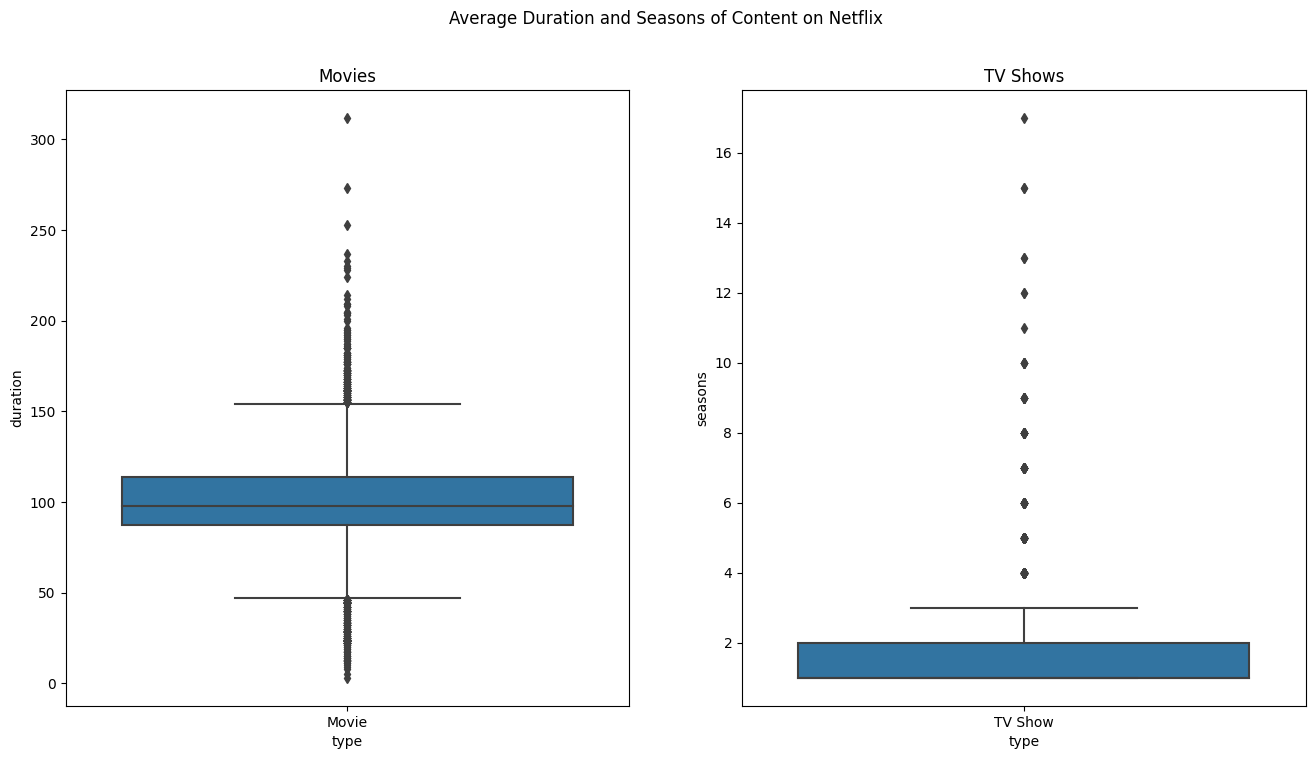

In [119]:
df_movies_avg['duration'] = df_movies_avg['duration'].astype(int)
df_tvshow_avg['seasons'] = df_tvshow_avg['seasons'].astype(int)

plt.figure(figsize=(16,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_avg, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvshow_avg, x='type', y='seasons')
plt.title('TV Shows')

plt.show()

**Insights:**

- The median movie duration on Netflix is approximately 100 minutes, while the median TV show consists of 1 season.
- Movie durations commonly range between 50 and 160 minutes.
- TV shows predominantly have 1, 2, or 3 seasons.

**Suggestions for Engagement:**

1. **Optimal Duration**: To maintain viewer engagement, aim for movie lengths up to 160 minutes, aligning with the common duration range.

2. **Seasons Strategy**: Design TV shows with up to 3 seasons, as this is a popular and well-received format.

3. **Narrative Efficiency**: Craft compelling storylines within the recommended duration and season limits to capture and retain audience interest.

By following these recommendations, Netflix can optimize content duration and season length for enhanced viewer engagement and overall revenue growth.

##Correlation in our data

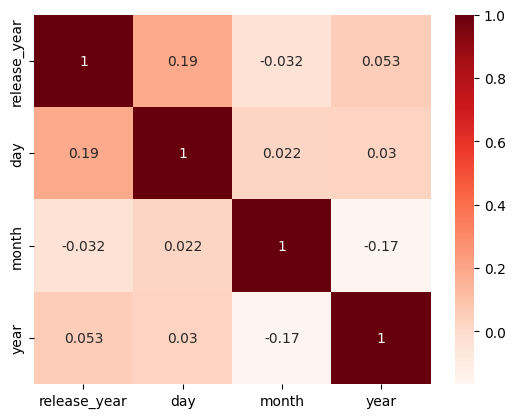

In [120]:
sns.heatmap(df_unnested.corr(), cmap = 'Reds', annot=True)
plt.show()

**Insights:**

The heatmap displays how numbers in the data relate to each other.
But in our case, the heatmap doesn't provide meaningful insights because our data only includes numerical values for the day, month, and year of movie or TV show releases.

##Content Ratings by Country

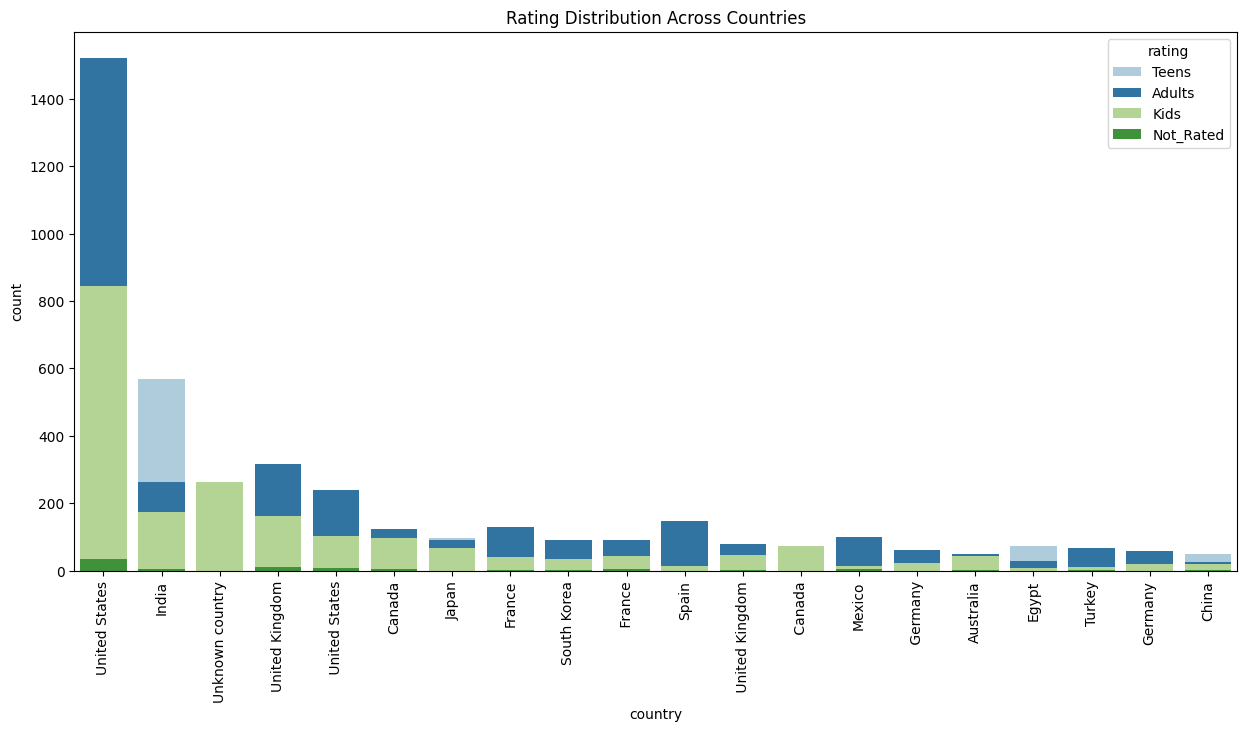

In [121]:
df_countrywise_content = df_unnested.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(15,7))
plt.title('Rating Distribution Across Countries')
sns.countplot(data=df_countrywise_content, x='country', hue = 'rating', dodge=False, order = df_countrywise_content['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()

**Insights:**

In the US and UK, there's a lack of content specifically created for teenagers. However, in India, a significant portion of content is tailored for teens.

**Suggestions for Audience Expansion:**

To attract new viewers, Netflix should focus on adding more content designed for teenagers, especially in regions where such content is currently limited. This could help broaden its audience base and increase engagement.

##Distribution of Top 30 Genres and Ratings

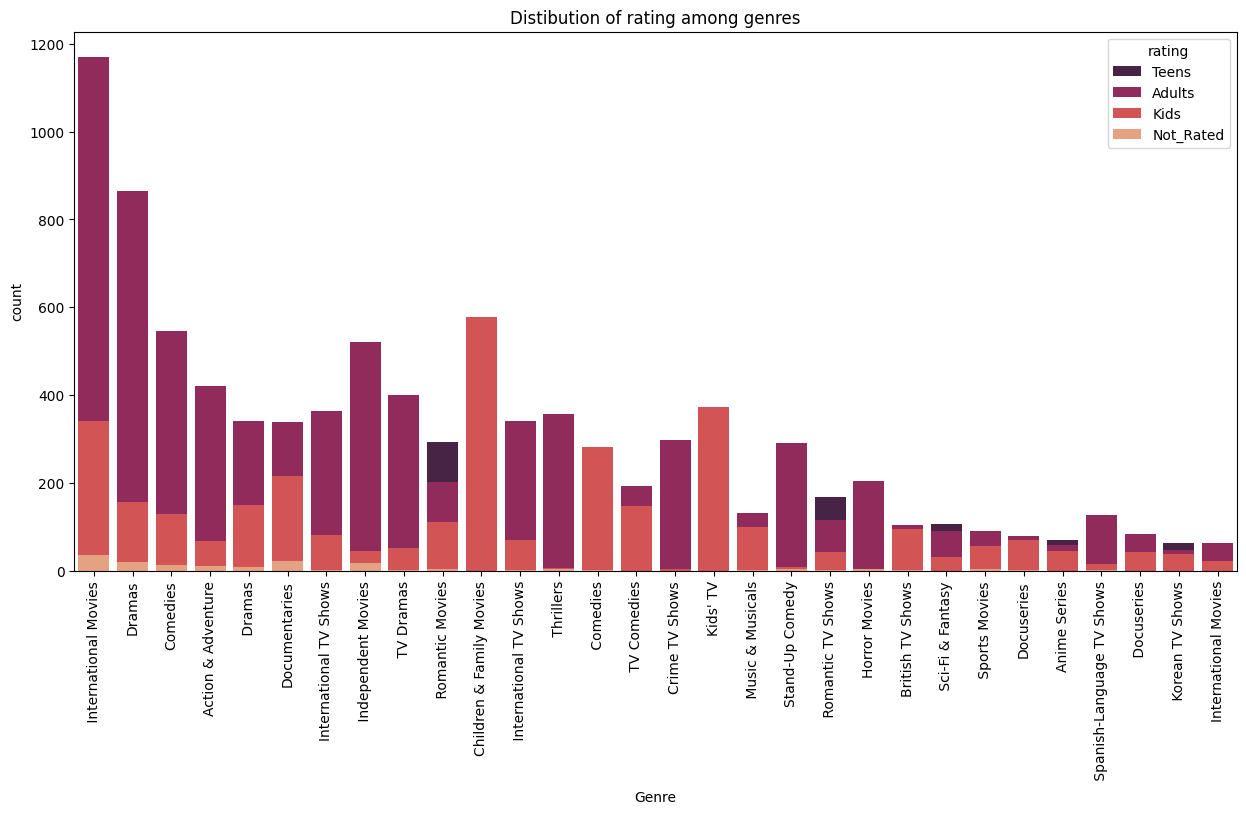

In [122]:
df_genre_rating = df_unnested.drop_duplicates(subset = ['Genre','title'])


plt.figure(figsize=(15,7))
plt.title('Distibution of rating among genres')
sns.countplot(data=df_genre_rating, x='Genre', hue = 'rating', dodge=False, order = df_genre_rating['Genre'].value_counts().head(30).index, palette='rocket')
plt.xticks(rotation=90)
plt.show()

**Insights:**

Most of Netflix's content is intended for adults.


**Suggestions for a Bigger Audience:**

1. **Kids and Teens Content**: To get more users, Netflix should add more shows and movies that kids and teens would enjoy.

2. **Different Types**: Offer various kinds of shows and movies that are interesting to young viewers.

3. **New Shows for Kids**: Create new TV shows that are exciting for kids and teenagers.

4. **Family Viewing**: Make content that families can watch together, with something for everyone.

5. **Listen to Users**: Ask kids, teens, and parents what they like and make more of that.

By doing these things, Netflix can make more people happy and have more people using their service.

#THANK YOU